In [19]:
# Imports:
#  - z_normalize(X, X_mean=None, X_std=None)
#  - gen_synth_norm_data(B,n=100,S_YdotX=None,X_range=(0,10),X_are_ints=True)
#  - estimate_model_params(X,Y)
#  - gen_synth_sub_data(B, n, epsilon, X_range, X_mean, X_std, X_are_ints=True)
#  - single_subject_eval(x_obs, y_obs, B, R, S_YdotX, X_mean, X_std)
from normstats import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.set_printoptions(suppress=True)

# For reproducibility
np.random.seed(abs(hash("giraffes are cool"))%(2**32))

In [20]:
# Parameters for normative synthetic data generation

# number of samples
n = 100
# number of ind vars
k = 3
# number of dep vars
m = 1
# std_dev of noise
S_YdotX_actual = np.random.uniform(10.0, 20.0, size=(m,1))

# B (model params) will be chosen randomly from this range
B_range = (100, 200)
B_actual = np.random.randint(B_range[0], B_range[1], size=(m, k+1))
#B = np.random.uniform(B_range[0], B_range[1], size=(m, k+1))
        
# X (ind vars) will be chosen randomly from this range
X_range = (1,20)
X_are_ints = True

# When X_are_ints == True, this will always make the ind vars [10, 10, ...]
synth_sub_X_range = (10,11)

# number of monte carlo iteration
n_itr = 1000

In [21]:
p_estimates = np.empty(n_itr)

for itr in range(n_itr):
    X, Y, epsilon_actual = gen_synth_norm_data(B_actual, n, S_YdotX_actual, X_range, X_are_ints=X_are_ints)
    B_estimate, S_YdotX_estimate, R, X_mean, X_std = estimate_model_params(X,Y)
    x_obs, y_obs = gen_synth_sub_data(B_actual, 1, 0.0, synth_sub_X_range, X_mean, X_std, X_are_ints=X_are_ints)
    p, p_ci = single_subject_eval(x_obs, y_obs, B_estimate, R, S_YdotX_estimate, n, X_mean, X_std)
    p_estimates[itr] = p[0][0]

In [22]:
p_lower_ci = np.percentile(p_estimates, 2.5)
p_upper_ci = np.percentile(p_estimates, 97.5)
p_mean = np.mean(p_estimates)

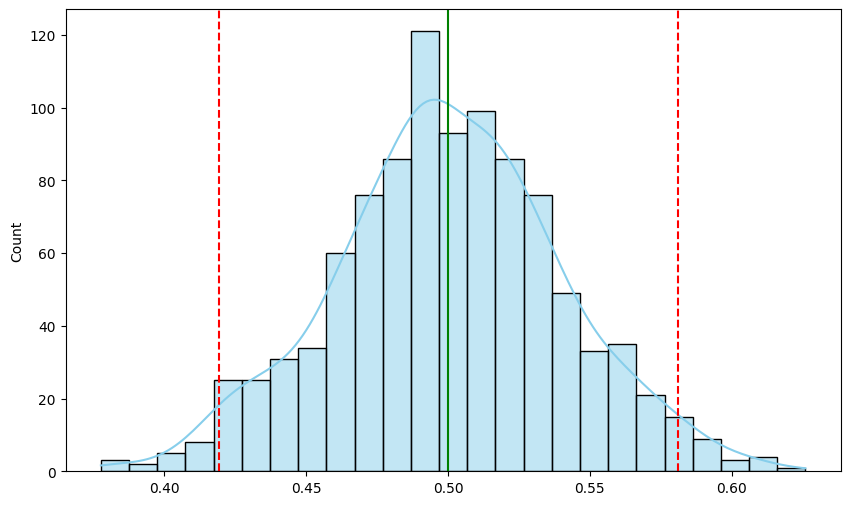

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(p_estimates, kde=True, color='skyblue')
# Add vertical lines for the confidence interval
plt.axvline(x=p_lower_ci, color='red', linestyle='--', label=f'2.5th percentile: {p_lower_ci:.2f}')
plt.axvline(x=p_upper_ci, color='red', linestyle='--', label=f'97.5th percentile: {p_upper_ci:.2f}')
plt.axvline(x=p_mean, color='green', linestyle='-', label=f'Mean: {p_mean:.2f}')

In [24]:
# confidence intervals via monte carlo simulation
print('Monte Carlo Results:')
print(f'n_itr: {n_itr} n: {n}')
print(f'mean: {p_mean:.5f} 95% CI: [{p_lower_ci:.5f},{p_upper_ci:.5f}]')
# confidence intervals via model (from the last round of the simulation)
print('Model estimates (last round):')
print(f'mean: {p[0][0]:.5f} 95% CI: [{p_ci[0][0]:.5f},{p_ci[0][1]:.5f}]')

Monte Carlo Results:
n_itr: 1000 n: 100
mean: 0.49993 95% CI: [0.41929,0.58093]
Model estimates (last round):
mean: 0.50704 95% CI: [0.42925,0.58463]
